## New York City AirBnB Open Data
### AirBnB listings and metrics in NYC, NY, USA (2019)
## AirBnB : Data Pre-Processing, Data Analysis, Data Visualizations, Regression, and Classification.

### Context:
This dataset gives information about the listing activity and various other metrics in NYC, NY for 2019.


## Importing libraries
Here we are importing all the libraries required for the case study.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
import os

In [2]:
os.getcwd()

'C:\\Users\\GLNB\\Desktop\\UNI-Essex-MSc-AI\\3.Machine-Learning-ML_PCOM7E\\archive'

In [3]:
Data = pd.read_csv('AB_NYC_2019.csv')

## Loading the dataset

In [4]:
Data_copy = Data.copy()
Data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Understanding the dataset

In [5]:
Data.shape

(48895, 16)

In [6]:
#+--------------------------------+------------------------------------------------------+
#| 1. id                             | listing id                                           |
#+--------------------------------+------------------------------------------------------+
#| 2. name                           | name of the listing                                  |
#+--------------------------------+------------------------------------------------------+
#| 3. host_id                        | host ID                                              |
#+--------------------------------+------------------------------------------------------+
#| 4. host_name                      | name of the host                                     |
#+--------------------------------+------------------------------------------------------+
#| 5. neighbourhood_group            | location                                             |
#+--------------------------------+------------------------------------------------------+
#| 6. neighbourhood                  | area                                                 |
#+--------------------------------+------------------------------------------------------+
#| 7. latitude                       | latitude coordinates                                 |
#+--------------------------------+------------------------------------------------------+
#| 8. longitude                      | longitude coordinates                                |
#+--------------------------------+------------------------------------------------------+
#| 9. room_type                      | listing space type                                   |
#+--------------------------------+------------------------------------------------------+
#| 10. price                          | price in dollars                                     |
#+--------------------------------+------------------------------------------------------+
#| 11. minimum_nights                 | amount of nights minimum                             |
#+--------------------------------+------------------------------------------------------+
#| 12. number_of_reviews              | number of reviews                                    |
#+--------------------------------+------------------------------------------------------+
#| 13. last_review                    | latest review                                        |
#+--------------------------------+------------------------------------------------------+
#| 14. reviews_per_month              | number of reviews per month                          |
#+--------------------------------+------------------------------------------------------+
#| 15. calculated_host_listings_count | amount of listing per host                           |
#+--------------------------------+------------------------------------------------------+
#| 16. availability_365               | number of days when listing is available for booking |
#+--------------------------------+------------------------------------------------------+

## Data Analysis and Visualizations

In [7]:
# Understanding datatypes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There are nearly 49k rows with 16 columns in the data. It is comprised of 3 float type columns, 7 int type columns and 6 object type columns.

In [8]:
Data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name columns respectively.

In [9]:
Data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

The mean price of the data is $152.7 

The Average availablity of an airbnb around a year is 112 days.

Note: The columns price and availability_365 will later be used for regression and classification

In [10]:
# Getting number of unique values in each column of the data
Data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

We can notice that we have 5 unique locations(neighbourhood_group column) in the dataset and have 3 room types (room_type column).

In [11]:
# Making sure if any duplicate values are present on the data.
Data.duplicated().sum()

0

We do not have any duplicate rows in our dataset.

### Host ID

In [12]:
Data.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

<AxesSubplot:>

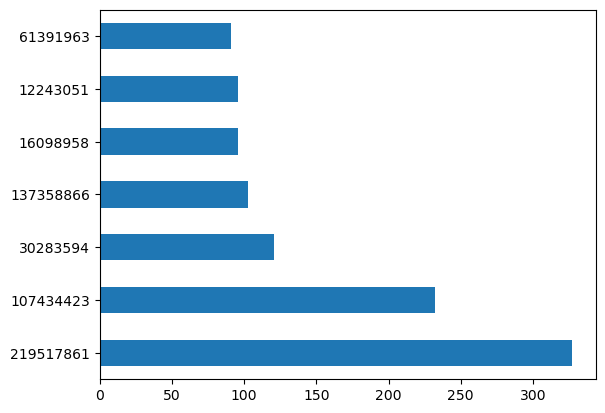

In [13]:
Data.host_id.value_counts().iloc[:7].plot(kind = 'barh')

We can observe that the most transactions done by a host (host_id = 219517861) is 327 in the year 2019.

### Room Type

In [14]:
# we noted that the room_type is only of 3 particular types.
Data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:ylabel='room_type'>

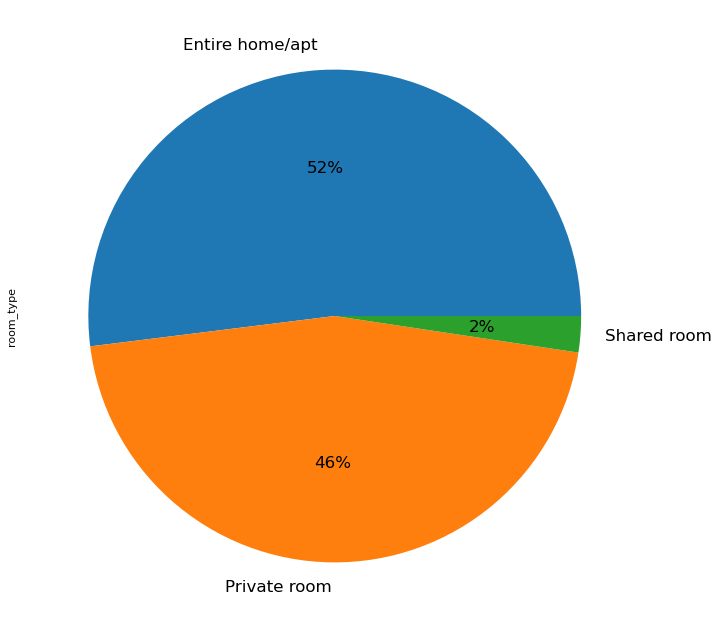

In [15]:
fig = plt.figure(figsize=(10,10), dpi=80)
Data['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=15)

It is intresting that in our dataset, 52% (~25k people) choose to live in an entire house while 46% (~22k people) opted for a private room. Only 2% (~1k people) people chose a shared room. This could mean that the majority of people who use airbnb could be families coming for tours,visits,etc...

### Neighbourhood Groups - Location

In [16]:
# There are 5 particular neighbourhood_group, implying 5 unique locations.
Data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:ylabel='neighbourhood_group'>

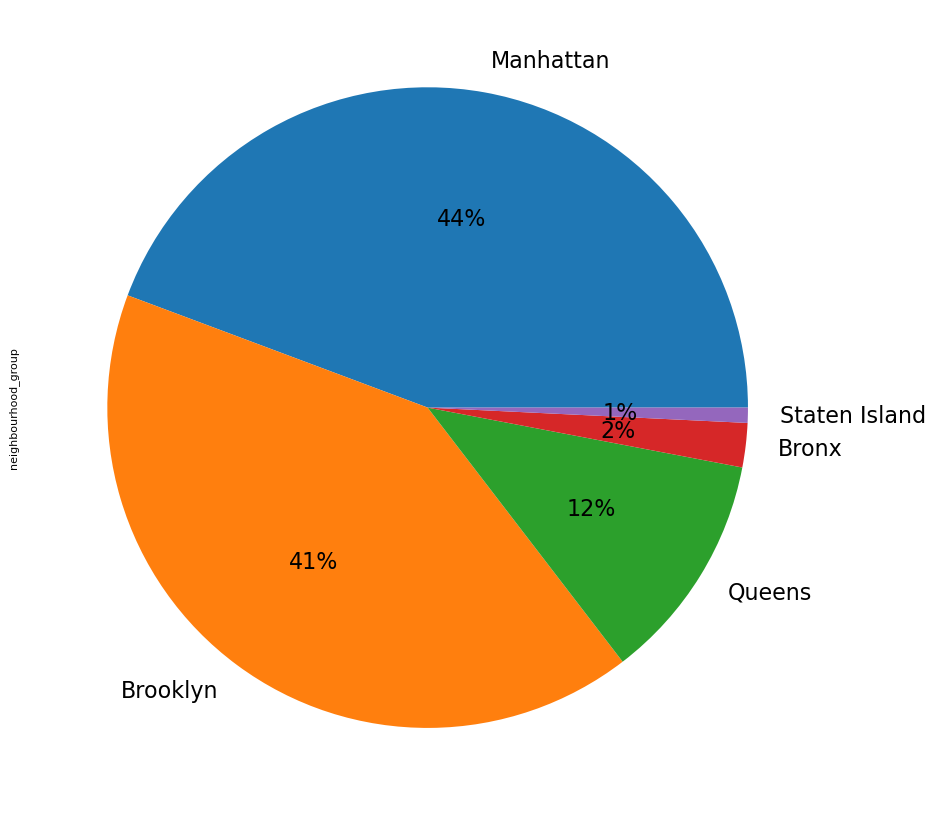

In [17]:
fig = plt.figure(figsize=(13,13), dpi=80)
Data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=20)

Evidently, Manhattan is the city where most Airbnb transactions have occured, covering up 44% of our entire dataset. The least transactions are in Staten Island, taking up only 1% of the dataset. Brooklyn had 41% of transactions along with Queens at 12% and Bronx at 2%.

### Neighbourhoods:

In [18]:
Data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [19]:
Data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

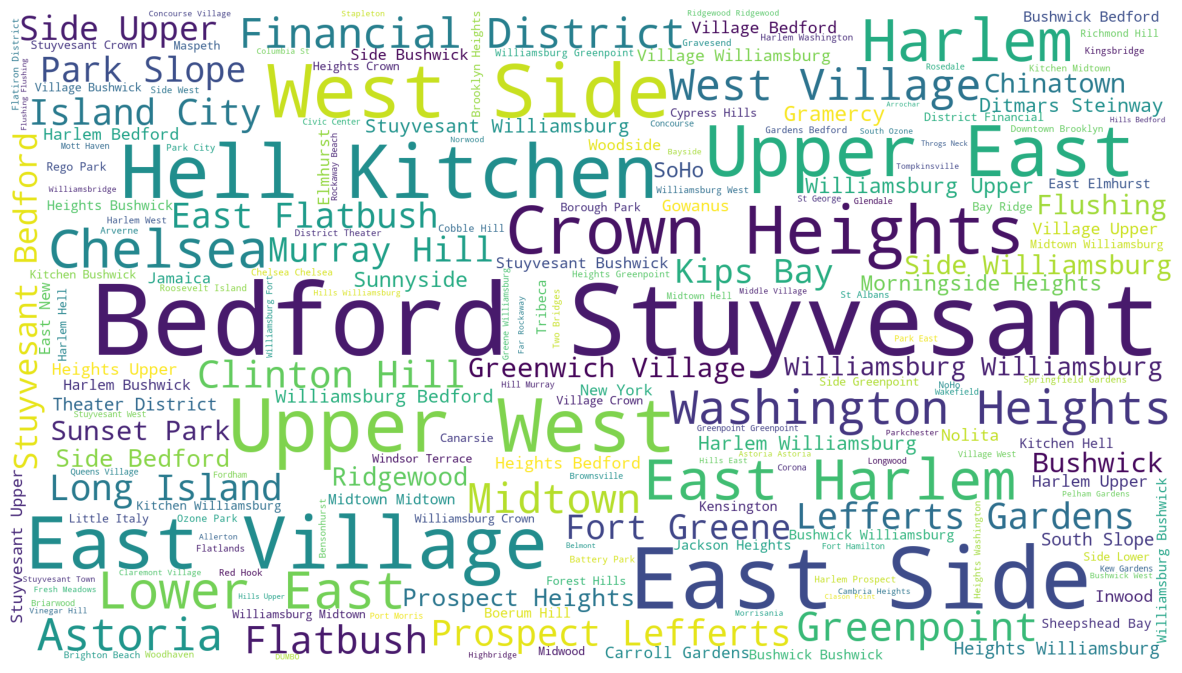

In [20]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(Data_copy.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:ylabel='neighbourhood'>

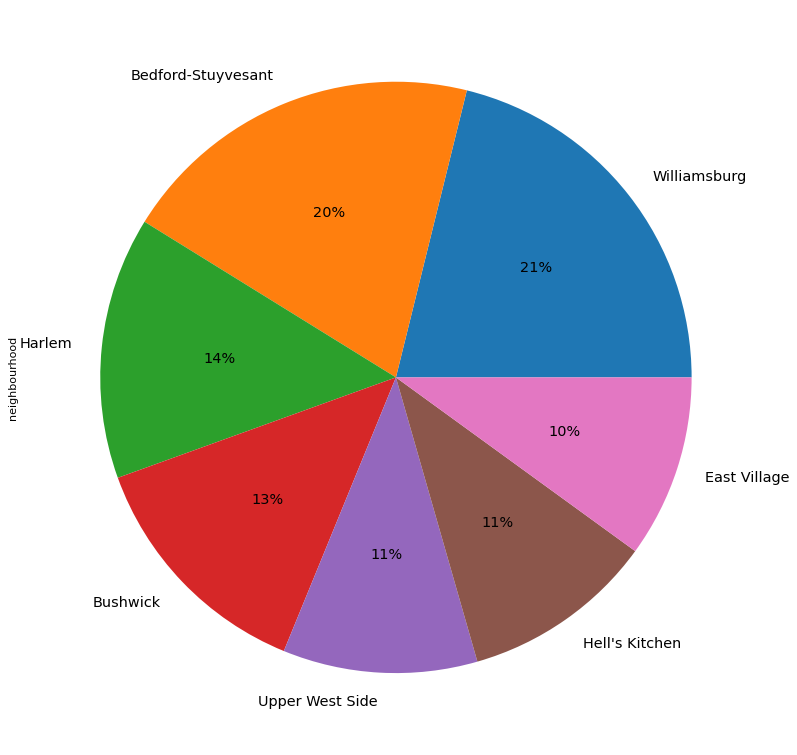

In [21]:
fig = plt.figure(figsize=(12,12), dpi=80)
Data['neighbourhood'].value_counts().iloc[:7].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant and so on.

This pie-chart shows the top 7 areas by percentage in the dataset.

### Price

In [22]:
Data.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

<AxesSubplot:>

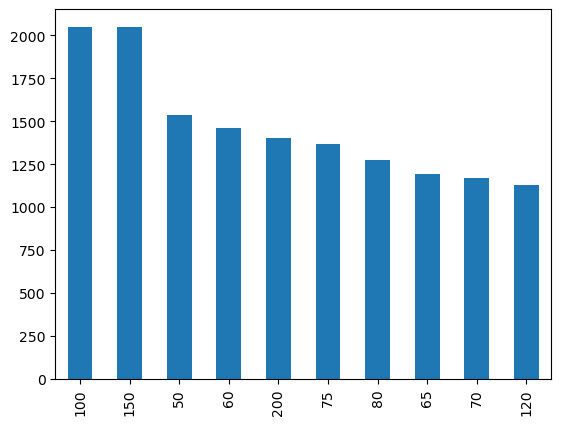

In [23]:
Data.price.value_counts().iloc[:10].plot(kind = 'bar')

The top 10 AirBnB's and their prices are shown above. 

More than 2000 AirBnB's have a price of 100 dollars and 150 dollars respectively.

A thousand more AirBnB's have around 50 dollars price and so on. 

In [24]:
# summary of the price column of the dataset
Data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


The average pricing is around $152.72

50% of data has price greater than 100 dollars.

The costliest airbnb is priced at $10,000.

In [25]:
#Details of the costliest AirBnB
Data[Data['price'] == 10000.000000]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151                0.04                               1                 0  
17692               0.16                               1                 0  
29238                NaN                               1                83


There are 3 AirBnBs with 10k price per night. They are obviously a luxury stay; one of which is a private room and 2 of them are home stay.

### Minimum Nights

In [26]:
Data['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [27]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(Data[Data['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


<AxesSubplot:>

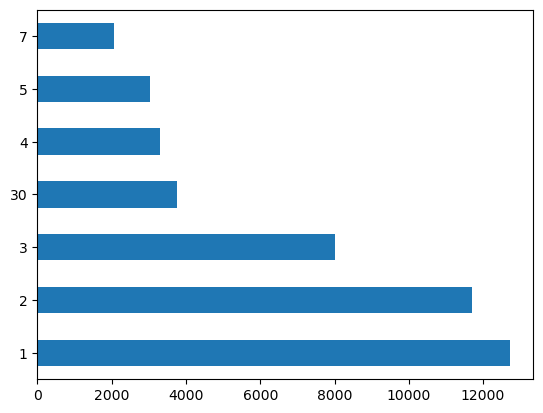

In [28]:
Data['minimum_nights'].value_counts().iloc[:7].plot(kind = 'barh')

We can observe that most of almost 12000 people stayed for 1 night in an AirBnB.

11000 people chose a 2 night stay while 7000 chose a 3 night stay and so on.

And also, almost 3800 people stayed upto a month.

### Number of reviews

In [29]:
Data['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

The above stat shows that there are no reviews for about 10,000 AirBnB's.

About 5200 of them have 1 review and the maximum number of reviews is 540 which only 1 airbnb has.

In [30]:
Data[Data['number_of_reviews'] == 540]

id                                      name  host_id host_name  \
1879  834190  Manhattan Lux Loft.Like.Love.Lots.Look !  2369681     Carol   

     neighbourhood_group    neighbourhood  latitude  longitude     room_type  \
1879           Manhattan  Lower East Side  40.71921  -73.99116  Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
1879     99               2                540  2019-07-06               6.95   

      calculated_host_listings_count  availability_365  
1879                               1               179



Manhattan Lux Loft.Like.Love.Lots.Look ! gets the highest reviews and it costs around 99 dollars.





 

### Availablity

In [31]:
Data['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64



Around 1300 AirBnB's have 365 days availablity and rest aren't available.


In [32]:
Data[Data['availability_365'] == 365].describe()

id       host_id     latitude    longitude        price  \
count  1.295000e+03  1.295000e+03  1295.000000  1295.000000  1295.000000   
mean   1.940195e+07  8.554698e+07    40.729014   -73.943275   250.769884   
std    1.197265e+07  8.786960e+07     0.057781     0.059799   550.497373   
min    2.539000e+03  2.787000e+03    40.507080   -74.242850    20.000000   
25%    8.725256e+06  8.931349e+06    40.687990   -73.983210    72.000000   
50%    2.065068e+07  4.634351e+07    40.730990   -73.954270   125.000000   
75%    3.027040e+07  1.565055e+08    40.762095   -73.921715   225.000000   
max    3.648315e+07  2.733930e+08    40.893740   -73.721730  9999.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      1295.00000        1295.000000         841.000000   
mean         19.60000          10.220849           0.832545   
std          65.05093          22.095983           1.112493   
min           1.00000           0.000000           0.010000   
25%           1.00000           0.000000           0.130000   
50%           3.00000           2.000000           0.410000   
75%          30.00000          10.000000           1.000000   
max        1250.00000         183.000000           8.940000   

       calculated_host_listings_count  availability_365  
count                     1295.000000            1295.0  
mean                        13.158301             365.0  
std                         36.224171               0.0  
min                          1.000000             365.0  
25%                          1.000000             365.0  
50%                          2.000000             365.0  
75%                          7.000000             365.0  
max                        327.000000             365.0


The costliest AirBnB with 365 days availablity costs around 10,000 dollars with average of 250 dollars.

### Reviews per month

In [33]:
Data_copy[Data_copy['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()                 

15908

Around 15000 AirBnBs have atleast 1 review per month.


In [34]:
Data[Data['reviews_per_month'] > 1]['reviews_per_month'].value_counts()            

2.00     406
3.00     222
4.00     130
1.15      90
1.05      88
        ... 
9.97       1
6.24       1
7.45       1
8.93       1
10.54      1
Name: reviews_per_month, Length: 837, dtype: int64



Around 406 AirBnBs have 2 reviews per month, 222 have 3, and so on.

In [35]:
# one with most reviews per month
Data['reviews_per_month'].max()

58.5

In [36]:
Data_copy[Data_copy['reviews_per_month'] == 58.5]

id                                               name    host_id  \
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
42075   Row NYC           Manhattan  Theater District  40.75918  -73.98801   

          room_type  price  minimum_nights  number_of_reviews last_review  \
42075  Private room    100               1                156  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  
42075               58.5                               9               299



Enjoy great views of the City in our Deluxe Room in Manhattan has the highest reviews per month. It is a Private room and is worth 100 dollars per night. 



### Bivariate Analysis

<AxesSubplot:>

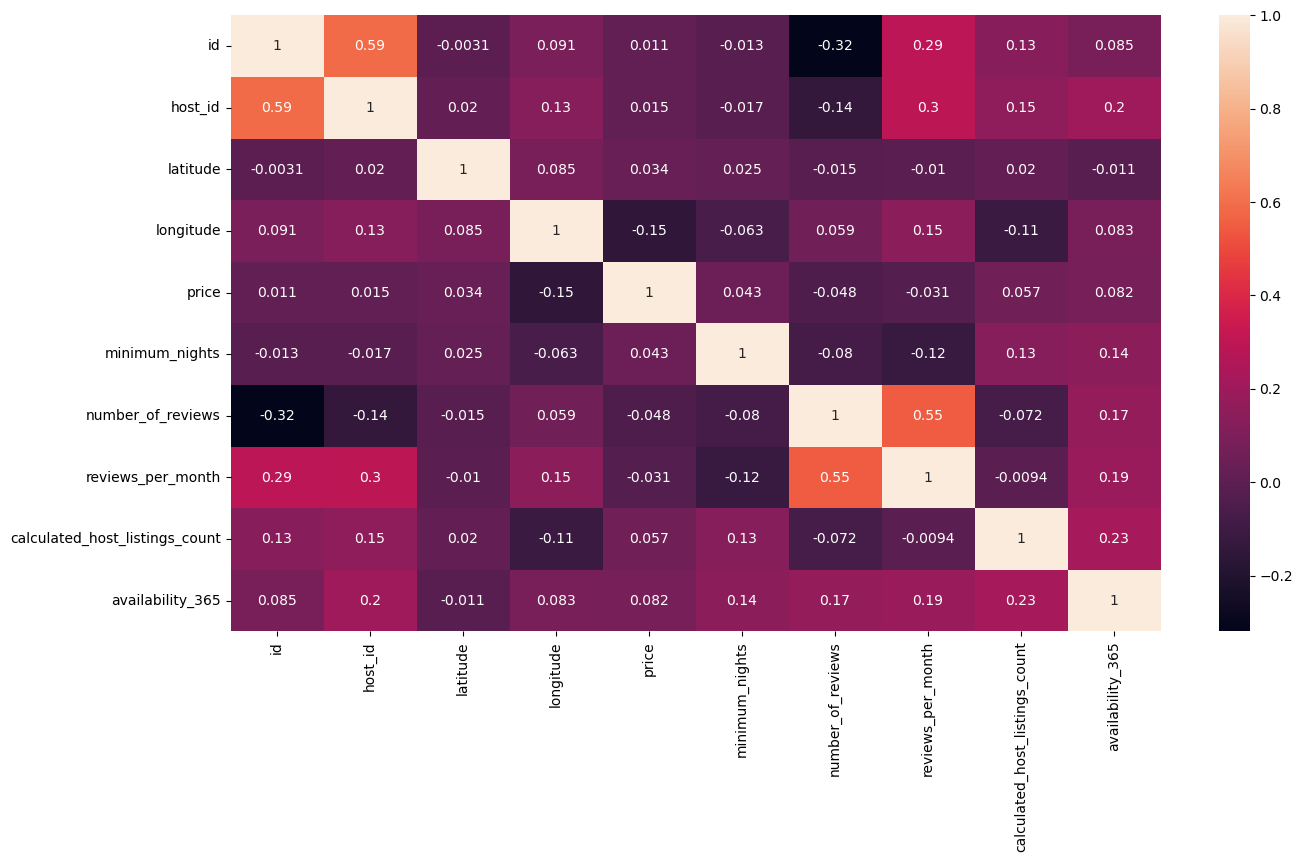

In [37]:
corr = Data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### Maps - Scatterplots

#### Latitude and Longitude with loaction

In [38]:
Data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

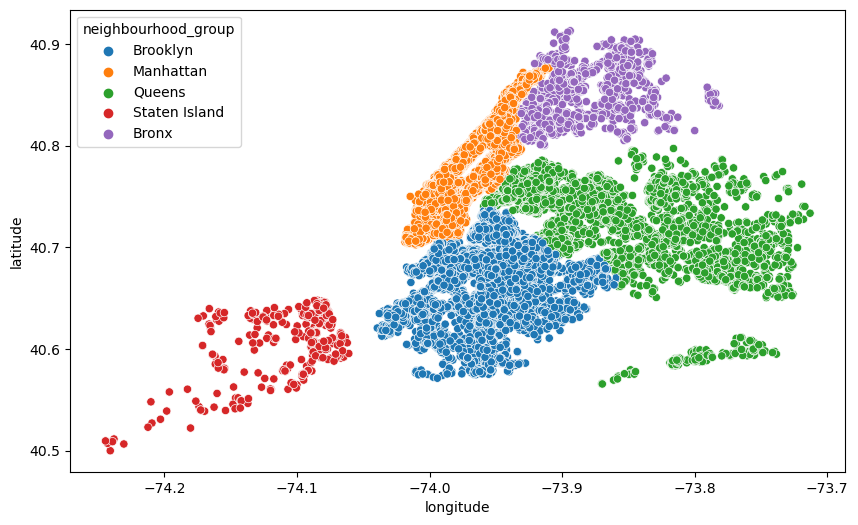

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(Data.longitude,Data.latitude,hue=Data.neighbourhood_group)

This shows us the dataset distribution in NewYork city with respect to latitude and longitude and the hue tells us about how they're separated.

#### Latitude and Longitude with room type

In [40]:
Data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

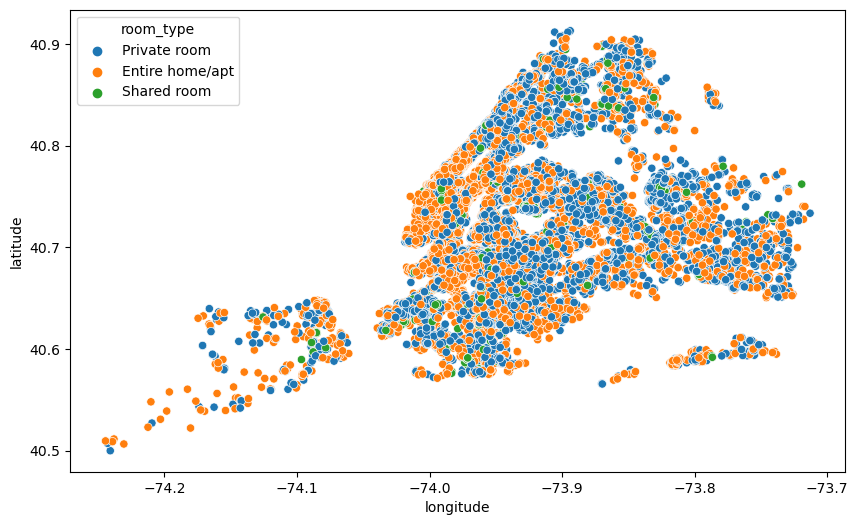

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(Data.longitude,Data.latitude,hue=Data.room_type)

#### Latitude and Longitude with room availablity for 365 days

C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

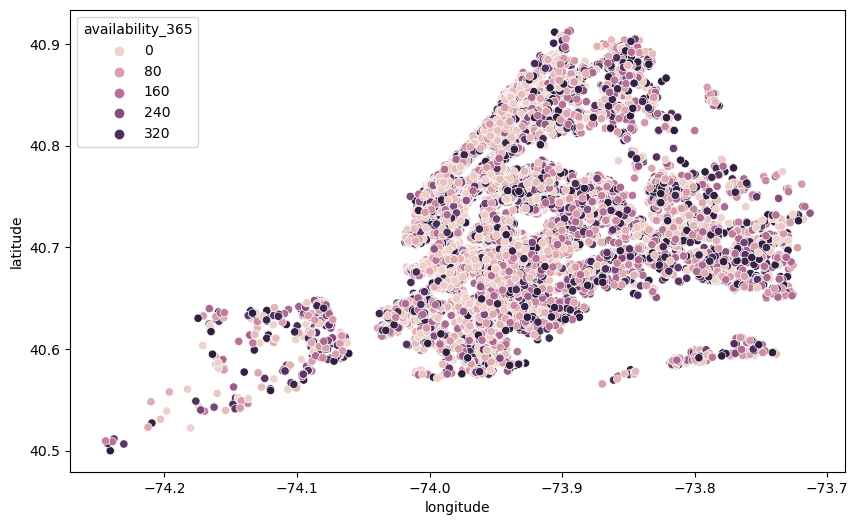

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(Data_copy.longitude,Data_copy.latitude,hue=Data_copy.availability_365)

### Plots

<AxesSubplot:xlabel='room_type', ylabel='count'>

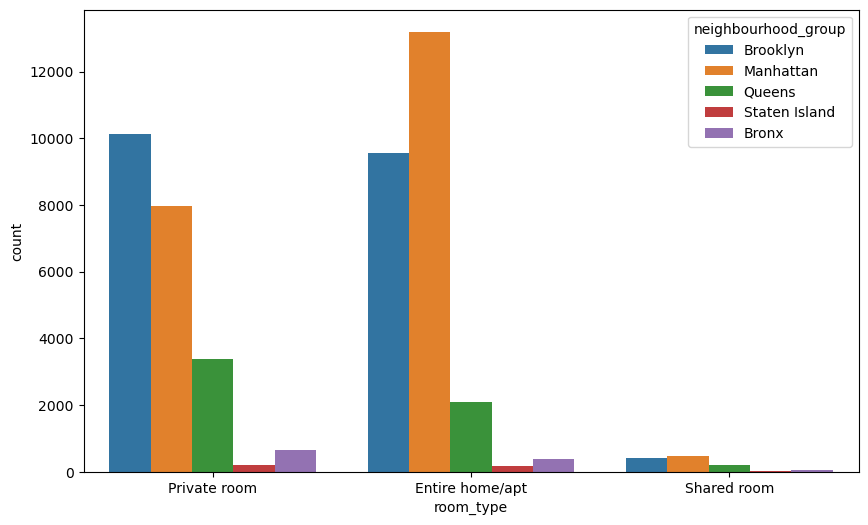

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data = Data, x = 'room_type', hue = 'neighbourhood_group')

Manhattan seems to offer the entire home/apt more than any other region. Also, entire home/apt is more readily available than other room tyes across all regions.

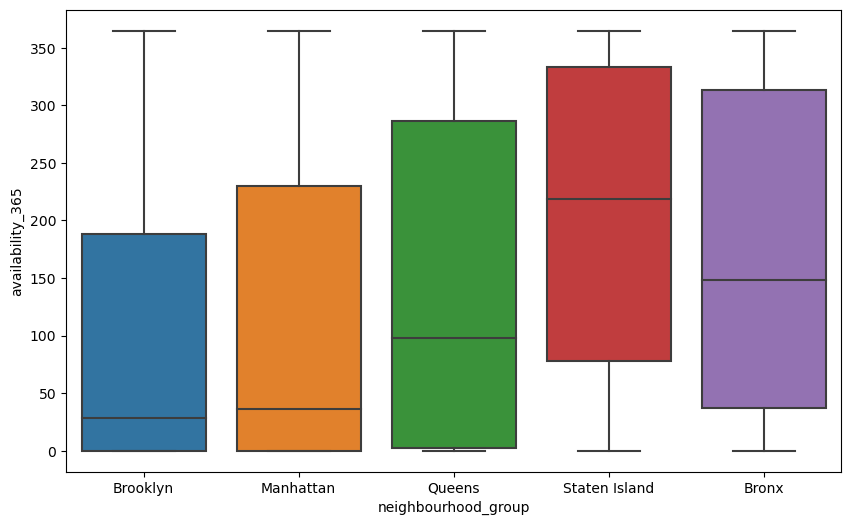

In [44]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=Data_copy, x='neighbourhood_group',y='availability_365')

Staten Island has the highest average availablity of an AirBnB. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

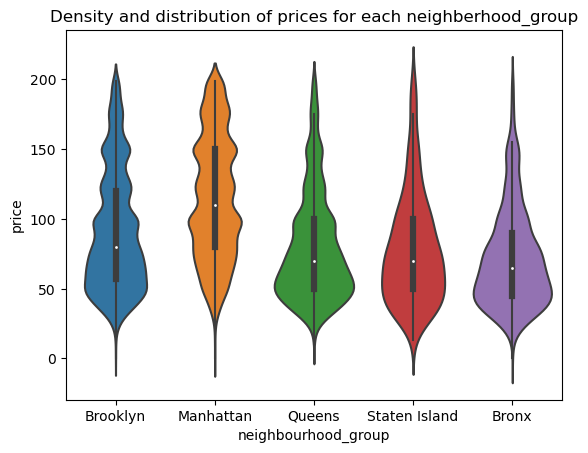

In [45]:
v2=sns.violinplot(data=Data[Data.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')


AirBnB's in Manhattan have the highest average price.


<AxesSubplot:>

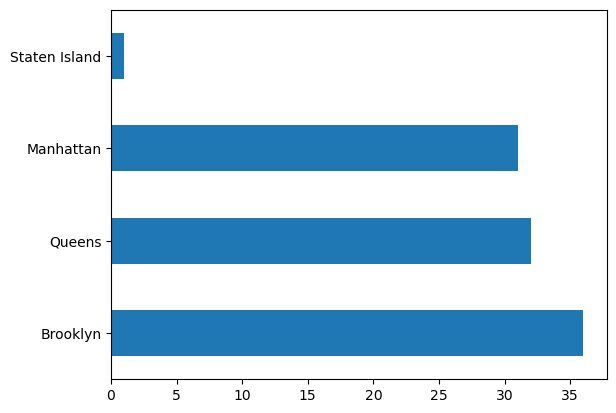

In [46]:
# Rooms with top 100 reviews by neighbourhood group
Data100Revs=Data.sort_values(by=['number_of_reviews'],ascending=False).head(100)
Data100Revs['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we look at the top 100 AirBnB's with number of reviews, Brooklyn has highest reviews followed by Queens and so on.

<AxesSubplot:>

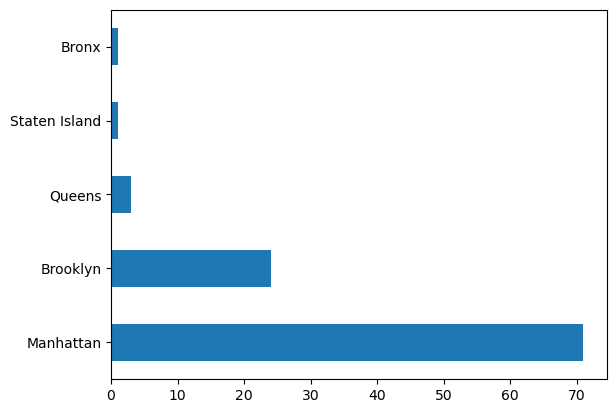

In [47]:
# Rooms with top 100 expensive by neighbourhood
Data100Price=Data.sort_values(by=['price'],ascending=False).head(100)
Data100Price['neighbourhood_group'].value_counts().plot(kind = 'barh')

Manhattan has more expensive AirBnB's than any other region.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

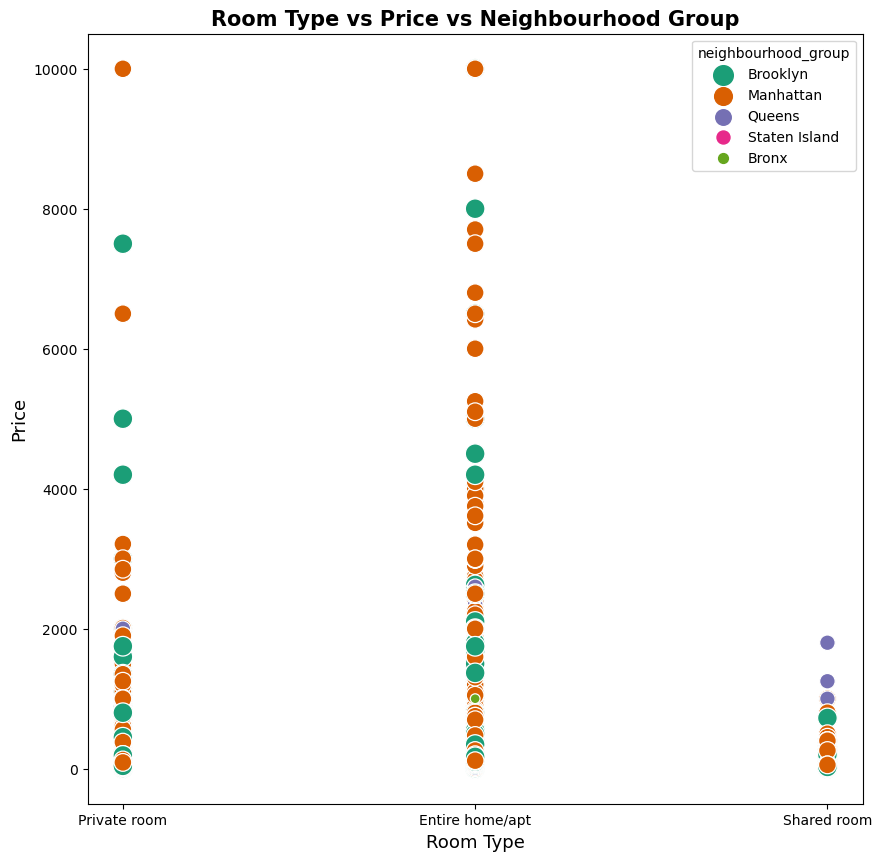

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=Data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

## Data Cleaning and Pre-Processing

We dont require host_id,name,id,host_name and last_review as these columns do not in any way, effect for further analysis or pre-processing. So we can drop them.

In [49]:
## We can remove the unwanted columns. Here id,name , host_name and last_review doesnt help us in anyway in our approch for data analysis.
Data.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
Data.head()

neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

Since we removed 4 columns from the dataframe, we now have to deal with 12 columns.

In [50]:
# checking for null/missing values
Data.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [51]:
Data['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

We can actually fill/impute all the missing values reviews_per_month  column with 0. This is because, since no on e has reviewed the AirBnB, it implies that the value to be zero.

In [52]:
Data['reviews_per_month'] = Data['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [53]:
Data.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Encoding Data and Outlier removal.

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps.

In [54]:
fig = px.box(Data, y="price")
fig.update_layout(
    autosize=False,
    width=500,
    height=400
)
fig.show()

We can see that there are quite a few outliers in the data; they could be expensive Airbnbs, but there are a very few of them compared to the whole data. Overall, this could have an impact on the model performance.So, we shall remove them.

<AxesSubplot:>

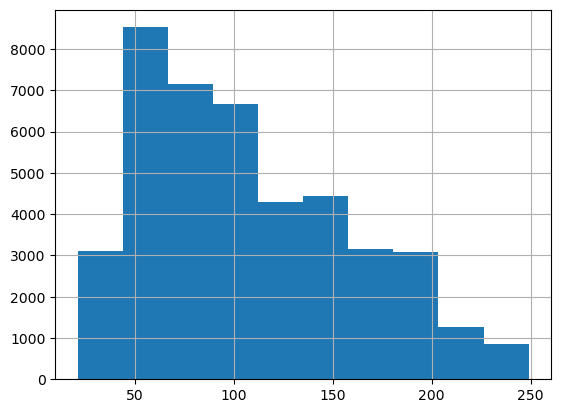

In [55]:
DataPrice= Data["price"][Data["price"] < 250]
DataPrice[DataPrice > 20].hist()

In [56]:
Data=Data[Data["price"]<250]
Data=Data[Data["price"]>20]
Data['room_type'].value_counts()

Private room       21722
Entire home/apt    19770
Shared room         1090
Name: room_type, dtype: int64

In [57]:
fig = px.box(Data, y="price")
fig

The data is very well distributed where the price ranges from $20 to $250. Hence, the above plot.

In [58]:
Data.fillna({'reviews_per_month':0}, inplace=True)
Data = pd.get_dummies(Data, columns=['neighbourhood_group',"room_type"], prefix = ['NeiborGrp',"RoomType"],drop_first=True)
Data.drop(["neighbourhood"], axis=1, inplace=True)
Data.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  NeiborGrp_Brooklyn  \
0                               6               365                   1   
1                               2               355                   0   
2                               1               365                   0   
3                               1               194                   1   
4                               1                 0                   0   

   NeiborGrp_Manhattan  NeiborGrp_Queens  NeiborGrp_Staten Island  \
0                    0                 0                        0   
1                    1                 0                        0   
2                    1                 0                        0   
3                    0                 0                        0   
4                    1                 0                        0   

   RoomType_Private room  RoomType_Shared room  
0                      1                     0  
1                      0                     0  
2                      1                     0  
3                      0                     0  
4                      0                     0

We performed Encoding on neighbourhood and room type and removed some unwanted columns.

## Linear Regression

Here we are intrested to predict the prices of Airbnb's with help of all other variables assosiated with it.

In [59]:
Data.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  NeiborGrp_Brooklyn  \
0                               6               365                   1   
1                               2               355                   0   
2                               1               365                   0   
3                               1               194                   1   
4                               1                 0                   0   

   NeiborGrp_Manhattan  NeiborGrp_Queens  NeiborGrp_Staten Island  \
0                    0                 0                        0   
1                    1                 0                        0   
2                    1                 0                        0   
3                    0                 0                        0   
4                    1                 0                        0   

   RoomType_Private room  RoomType_Shared room  
0                      1                     0  
1                      0                     0  
2                      1                     0  
3                      0                     0  
4                      0                     0

In [60]:
Data.shape

(42582, 12)

I am taking the price as 'y' and the rest of columns as 'X'. Here we can see that the data are all of different scales and hence we use the help of StandardScaler to scale them and we can procced with out splitting.

In [61]:
X = Data.drop(['price'],axis=1)
y = Data['price'].values.reshape(-1,1)


scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X)
y = scale_X.fit_transform(y)


I used 30% of the data for testing and fitting it to the linear model which we generated using the rest off the data.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29807, 11)
(29807, 1)
(12775, 11)
(12775, 1)


This is our linear model and we can see the intercept and coefficents at the end.

In [64]:



# instantiate
LinMod = LinearRegression()

# fit the model to the training data (learn the coefficients)
LinMod.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",LinMod.intercept_)

print("coefficients are: ",LinMod.coef_)

intercept is:  [-0.00065527]
coefficients are:  [[-0.06012777 -0.00322637 -0.02921139  0.05312798  0.09180824  0.15880011
   0.37331764  0.04477949 -0.00667876 -0.60179669 -0.25548752]]


In [65]:
y_pred = LinMod.predict(X_test)

In [66]:

print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.49825062463278325


mean_absolute_error : 0.5447704306017557


mean_squared_error :  0.4979601463281744


root_mean_squared_error :  0.7056629126772743


We can from here interpret the fact that R2 is almost 0.5 which means the model is moderate in nature and not particularly weak. We have also got our RMSE around 0.7 which is fine.



Next, we go for a 10 fold cross validation on our Linear model.

In [67]:

my_pipeline = Pipeline(steps=[('model', LinearRegression())])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* scores
scores1 =  1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')
scores2 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')
scores3 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')

print("R squared scores:\n", scores1)
print("Average R squared score (across experiments):",scores1.mean())


print("RMSE scores:\n", scores3)
print("Average RMSE score (across experiments):",scores3.mean())

R squared scores:
 [0.40285593 0.43615142 0.4762851  0.51862289 0.46868858 0.4777346
 0.4933936  0.47629253 0.54692744 0.53290862]
Average R squared score (across experiments): 0.4829860705352532
RMSE scores:
 [0.75009141 0.7151905  0.71130755 0.69458738 0.70942643 0.69992466
 0.69973819 0.71329621 0.72334227 0.72276634]
Average RMSE score (across experiments): 0.7139670947693814


We can see that the average R square came around 0.48 and RMSE around 0.71.

In [68]:
x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
#OLS is Ordinary Least Squares
#est.TAB
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3777.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:59:52   Log-Likelihood:                -45920.
No. Observations:               42582   AIC:                         9.186e+04
Df Residuals:                   42570   BIC:                         9.197e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.13e-16      0.003   2.07e-13      1.0

## Classification Algorithms

In [69]:
Data_classification = Data

In [70]:
Data_classification['availability_365'] = Data_classification['availability_365'].apply(lambda x: 1 if x == 365 else 0)

For simplicity, we have encoded the values in availability_365. The rows with 365 as a value are assigned 1, the rest with 0.

C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='availability_365', ylabel='count'>

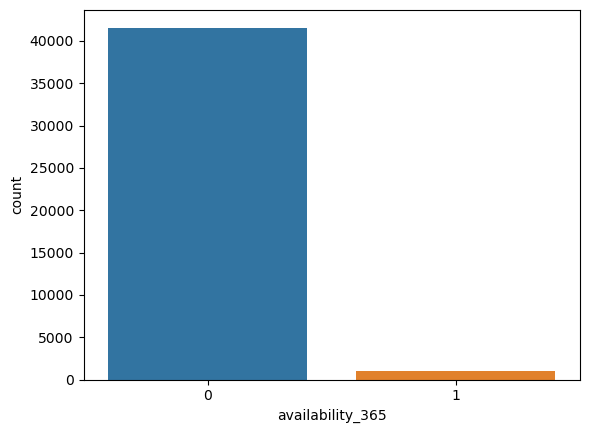

In [71]:
sns.countplot(Data_classification['availability_365'])

In [72]:
X = Data_classification.drop(['availability_365'],axis=1)
y = Data_classification['availability_365'].values


As theres a huge imbalance in the target variable, we will have to balance out the data by using SMOTING.

In [73]:
from imblearn.over_sampling import SMOTE
import imblearn
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

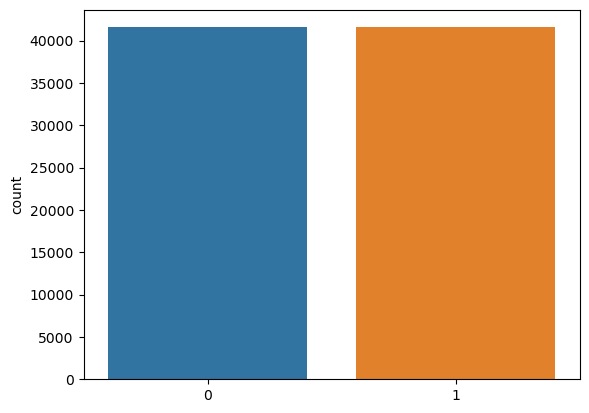

In [74]:
sns.countplot(y)

In [75]:
len(y)

83156

Defining a functiom to perform classification plotting of confusion matrix.

In [76]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  
  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)



### Logistic Regression

C:\Users\GLNB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\GLNB\AppData\Local\Temp\ipykernel_30592\1413129324.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\GLNB\AppData\Local\Temp\ipykernel_30592\1413129324.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



Confusion matrix:
 [[11341  1157]
 [ 3941  8508]]


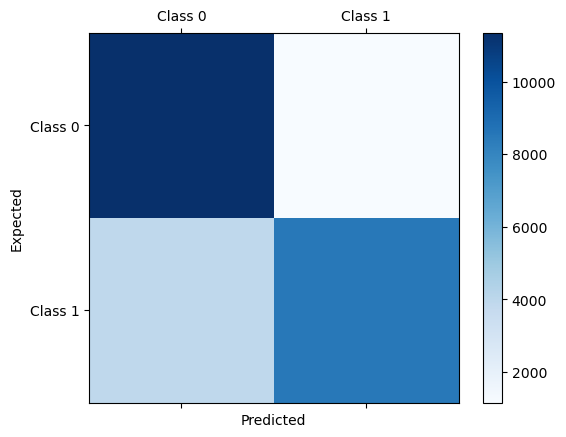

Accuracy 0.7956467711548483
              precision    recall  f1-score   support

           0       0.74      0.91      0.82     12498
           1       0.88      0.68      0.77     12449

    accuracy                           0.80     24947
   macro avg       0.81      0.80      0.79     24947
weighted avg       0.81      0.80      0.79     24947

AUC Score: 
0.7954267879261999


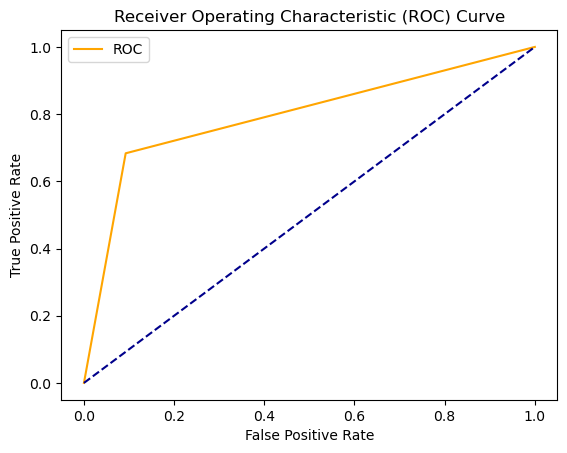

In [77]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

### KNN

Confusion matrix:
 [[10613  1885]
 [  337 12112]]


C:\Users\GLNB\AppData\Local\Temp\ipykernel_30592\1413129324.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\GLNB\AppData\Local\Temp\ipykernel_30592\1413129324.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



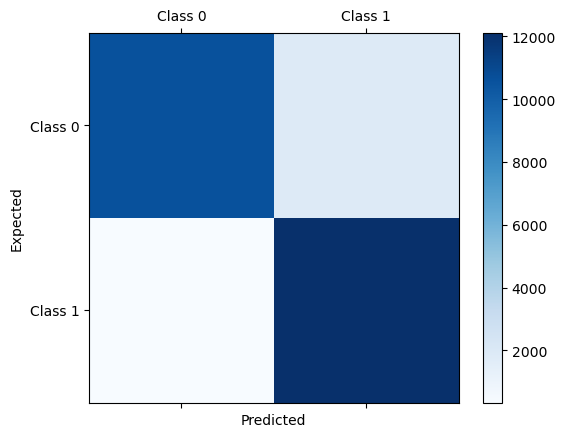

Accuracy 0.9109311740890689
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     12498
           1       0.87      0.97      0.92     12449

    accuracy                           0.91     24947
   macro avg       0.92      0.91      0.91     24947
weighted avg       0.92      0.91      0.91     24947

AUC Score: 
0.9110527103567032


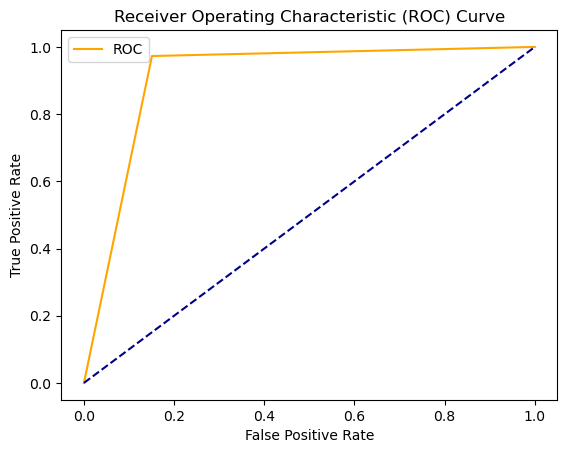

In [78]:
classifier = KNeighborsClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

Minimum error:- 0.060327895137691906 at K = 0


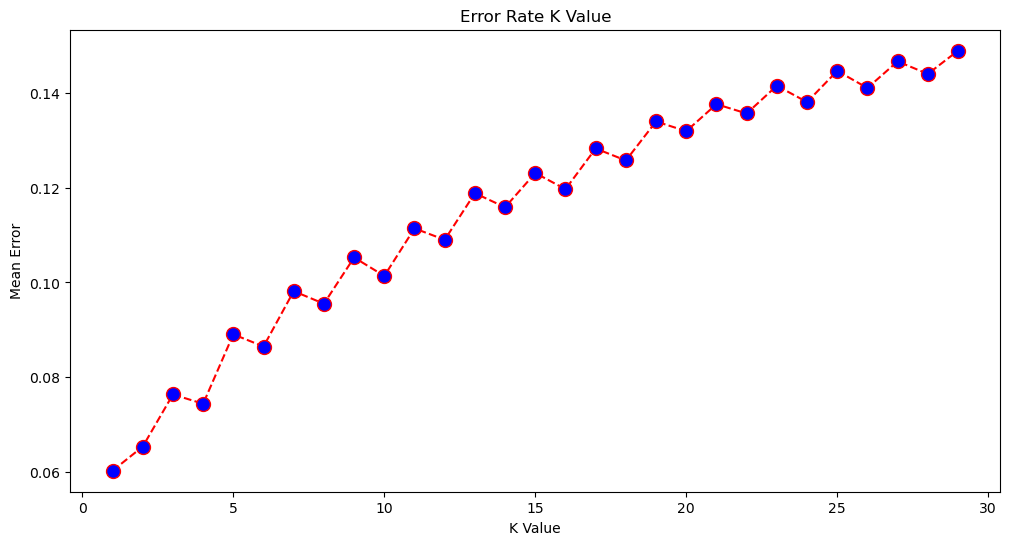

In [79]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error)))

Here, we can check on how the mean error gets varied with respect to that of the number of neighbours. We can see that the best k value that corresponds to least error rate comes initially and gradually increases across the scale. This is because we have initaially done a synthesised oversampling of data so already data points are plotted based on feature grouping and thats why wehen we run KNN we would end up with least error at first and gradually error increases on increasing n.

###  Decision tree

Confusion matrix:
 [[11744   754]
 [  465 11984]]


C:\Users\GLNB\AppData\Local\Temp\ipykernel_30592\1413129324.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\GLNB\AppData\Local\Temp\ipykernel_30592\1413129324.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



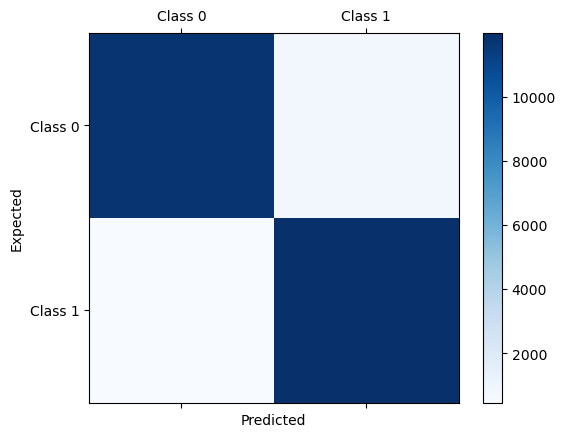

Accuracy 0.9511364091874774
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     12498
           1       0.94      0.96      0.95     12449

    accuracy                           0.95     24947
   macro avg       0.95      0.95      0.95     24947
weighted avg       0.95      0.95      0.95     24947

AUC Score: 
0.9511589747363032


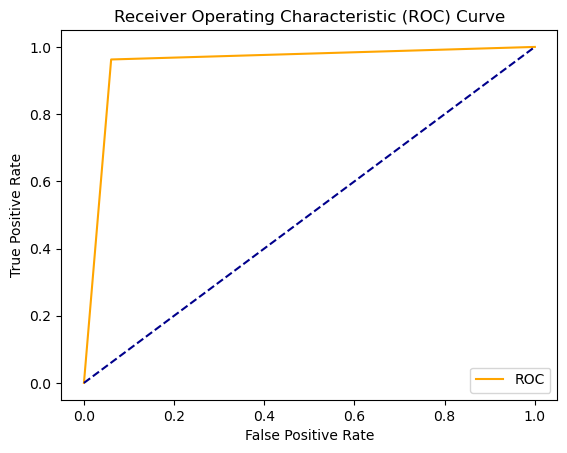

In [80]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

C:\Users\GLNB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Figure size 640x480 with 0 Axes>

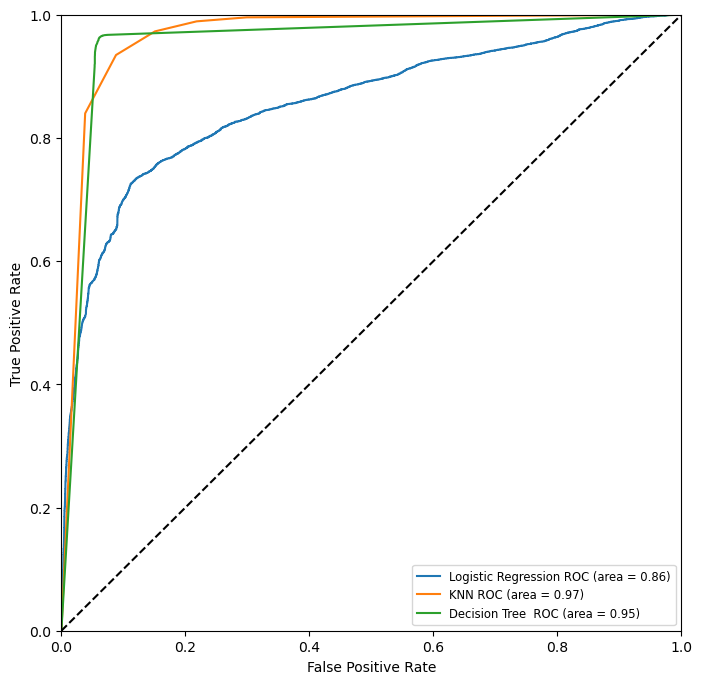

In [81]:
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
DT_model = tree.DecisionTreeClassifier()

models = [
  
        {
        'label': 'Logistic Regression',
        'model': logreg_model
    },
      {
        'label': 'KNN',
        'model': knn_model
    },
  
    {
        'label': 'Decision Tree ',
        'model': DT_model
    }
]

from sklearn.metrics import roc_curve, roc_auc_score, auc


plt.clf()
plt.figure(figsize=(8,8))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

Decision Tree as well as KNN model seems to be working well for our data and has good classification ability over Naive Bayes and Logistic Regression.